In [ ]:
#FNHTR analysis



In [12]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from google.cloud import bigquery
pd.set_option('display.max_rows', 100)    # Show all rows



load_dotenv()
query_path = os.environ.get('BASE_QUERY_PATH')
client = bigquery.Client(os.environ.get('BIGQUERY_PROJECT_NAME'))



In [13]:
print(os.environ.get('BIGQUERY_PROJECT_NAME'))

phys-439706


In [14]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/meaning.sql", 'r') as file:
    FNHRT_read = file.read()

FNHRT_result = client.query(FNHRT_read).to_dataframe()
FNHRT_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,itemid,label,linksto
0,225168,Packed Red Blood Cells,inputevents_mv
1,225170,Platelets,inputevents_mv
2,225171,Cryoprecipitate,inputevents_mv
3,227070,PACU Packed RBC Intake,inputevents_mv
4,227071,PACU Platelet Intake,inputevents_mv
5,227072,PACU FFP Intake,inputevents_mv
6,220970,Fresh Frozen Plasma,inputevents_mv
7,227532,Plasma Pheresis,inputevents_mv
8,226367,OR FFP Intake,inputevents_mv
9,226368,OR Packed RBC Intake,inputevents_mv


In [8]:
# Export to a CSV file
FNHRT_result.to_csv('output.csv', index=False)


In [21]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHRT.sql", 'r') as file:
    FNHRT_read = file.read()

FNHRT_result = client.query(FNHRT_read).to_dataframe()
FNHRT_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id,hadm_id,icustay_id,transfusion_starttime,temp_recorded_time,temperature_fahrenheit,fnthr_criteria,symptoms_present
0,109,126055,236124,2141-10-17 17:45:00,2141-10-25 08:00:00,102.0,Temperature rise ≥1°C (1.8°F) above baseline,[Respiratory Rate]
1,109,126055,236124,2141-10-17 17:45:00,2141-10-24 05:00:00,100.8,Temperature rise ≥1°C (1.8°F) above baseline,[Respiratory Rate]
2,109,126055,236124,2141-10-18 18:10:00,2141-10-25 08:00:00,102.0,Temperature rise ≥1°C (1.8°F) above baseline,[Respiratory Rate]
3,109,126055,236124,2141-10-18 18:10:00,2141-10-24 05:00:00,100.8,Temperature rise ≥1°C (1.8°F) above baseline,[Respiratory Rate]
4,109,126055,236124,2141-10-24 14:03:00,2141-10-25 08:00:00,102.0,Temperature rise ≥1°C (1.8°F) above baseline,[Respiratory Rate]
...,...,...,...,...,...,...,...,...
151950,99955,108494,243255,2139-07-14 04:59:00,2139-07-17 22:00:00,101.2,Temperature ≥38°C (100.4°F),[Respiratory Rate]
151951,99955,108494,243255,2139-07-14 04:59:00,2139-07-19 01:00:00,104.6,Temperature ≥38°C (100.4°F),[Respiratory Rate]
151952,99955,108494,243255,2139-07-14 04:59:00,2139-07-15 00:00:00,103.3,Temperature ≥38°C (100.4°F),[Respiratory Rate]
151953,99955,108494,243255,2139-07-14 04:59:00,2139-07-16 22:00:00,101.1,Temperature ≥38°C (100.4°F),[Respiratory Rate]


In [4]:
#Check unique patients
unique_patients = FNHRT_result.drop_duplicates(subset=['subject_id']).reset_index(drop=True)
unique_patients.head()




,subject_id,hadm_id,icustay_id,transfusion_starttime,temp_recorded_time,temperature_fahrenheit,fnthr_criteria,symptoms_present
0,109,126055,236124,2141-10-17 17:45:00,2141-10-25 08:00:00,102.0,Temperature rise ≥1°C (1.8°F) above baseline,[Respiratory Rate]
1,124,138376,256064,2166-01-09 13:42:00,2166-01-22 08:00:00,100.8,Temperature ≥38°C (100.4°F),[Respiratory Rate]
2,406,100765,231758,2126-03-12 20:40:00,2126-03-16 20:00:00,100.6,Temperature ≥38°C (100.4°F),[Respiratory Rate]
3,502,116367,209737,2143-10-24 02:31:00,2143-11-04 11:36:00,100.5,Temperature ≥38°C (100.4°F),[Respiratory Rate]
4,605,149601,225778,2197-12-04 02:11:00,2197-12-14 12:00:00,100.9,Temperature ≥38°C (100.4°F),[Respiratory Rate]


In [5]:
len(unique_patients)

2096

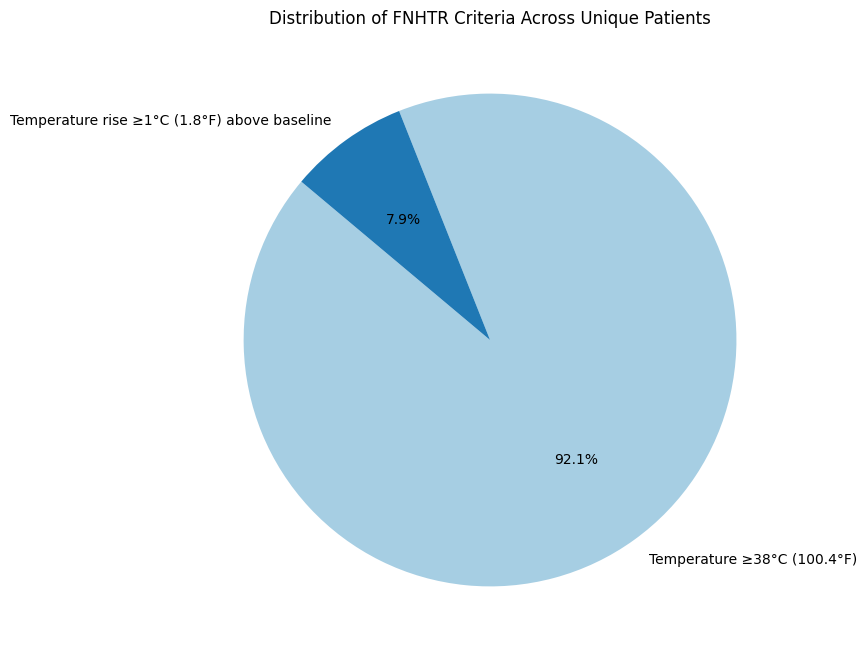

In [20]:
import matplotlib.pyplot as plt

# Assuming FNHRT_result is already loaded as the DataFrame from the BigQuery result

# Counting occurrences of each FNHTR criteria
fnthr_counts = unique_patients['fnthr_criteria'].value_counts()

# Plotting a pie chart for FNHTR criteria distribution
plt.figure(figsize=(8, 8))
fnthr_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of FNHTR Criteria Across Unique Patients")
plt.ylabel("") 
plt.show()


In [16]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/fnhrt2.sql", 'r') as file:
    FNHRT_read = file.read()

FNHRT_result = client.query(FNHRT_read).to_dataframe()
FNHRT_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id,hadm_id,icustay_id,transfusion_starttime,transfusion_endtime,measurement_time,temperature_itemid,temperature_label,temperature_value,temperature_numeric_value,temperature_unit
0,34,144319,290505,2191-02-23 16:19:00,2191-02-23 17:19:00,2191-02-23 20:00:00,223761,Temperature Fahrenheit,97.2,97.2,?F
1,107,174162,264253,2122-05-14 21:57:00,2122-05-14 22:57:00,2122-05-15 00:00:00,223761,Temperature Fahrenheit,98.1,98.1,?F
2,107,174162,264253,2122-05-14 23:10:00,2122-05-15 00:10:00,2122-05-15 00:00:00,223761,Temperature Fahrenheit,98.1,98.1,?F
3,107,174162,264253,2122-05-14 21:57:00,2122-05-14 22:57:00,2122-05-15 00:00:00,223761,Temperature Fahrenheit,98.1,98.1,?F
4,107,174162,264253,2122-05-14 23:10:00,2122-05-15 00:10:00,2122-05-15 00:00:00,223761,Temperature Fahrenheit,98.1,98.1,?F
...,...,...,...,...,...,...,...,...,...,...,...
2526992,99995,137810,229633,2147-02-08 16:03:00,2147-02-08 16:04:00,2147-02-09 00:15:00,223761,Temperature Fahrenheit,98.5,98.5,?F
2526993,99995,137810,229633,2147-02-09 00:00:00,2147-02-09 02:20:00,2147-02-09 04:00:00,223761,Temperature Fahrenheit,98.5,98.5,?F
2526994,99995,137810,229633,2147-02-08 16:04:00,2147-02-08 16:05:00,2147-02-09 04:00:00,223761,Temperature Fahrenheit,98.5,98.5,?F
2526995,99995,137810,229633,2147-02-08 16:03:00,2147-02-08 16:04:00,2147-02-09 04:00:00,223761,Temperature Fahrenheit,98.5,98.5,?F


In [22]:
# Get unique patients by removing duplicates based on 'subject_id'
unique_patients = FNHRT_result[['subject_id']].drop_duplicates().reset_index(drop=True)

unique_patients



,subject_id
0,109
1,124
2,406
3,502
4,605
...,...
2091,99836
2092,99863
2093,99923
2094,99939
